# Springboard Capstone Project 2
## Table and figure generation for final report
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from importlib import reload
import json
import seaborn as sns
import gc

# custom module for capstone 2
import cap2tools as c2t
reload(c2t)

Using TensorFlow backend.


<module 'cap2tools' from 'C:\\Users\\Nils\\Documents\\GitHub\\Springboard-Capstone-2-local-yelp\\cap2tools.py'>

In [2]:
# workaround for graphviz PATH issue in Anaconda
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [31]:
# configure GPU memory usage by tensorflow
config = K.tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.80
K.tensorflow_backend.set_session(K.tf.Session(config=config))

In [4]:
# load image information
data = pd.read_csv('photo_labels_all.csv')

In [5]:
# make class imbalance table
table = pd.DataFrame(data.label.value_counts())
table.columns = ['Image Count']
table.index.name = 'Class'
table['Abundance (%)'] = table['Image Count']/table['Image Count'].sum() * 100
table.to_csv('figures/class_imba_table.csv')
table

,Image Count,Abundance (%)
Class,,
food,184456,65.644574
inside,61620,21.929450
outside,23214,8.261445
drink,10350,3.683379
menu,1352,0.481152


In [6]:
# make table of class abundance in each set
train = data[data.set=='train']
val = data[data.set=='val']
test = data[data.set=='test']

abundances = pd.DataFrame()
abundances['Train'] = train.label.value_counts()
abundances.Train = abundances.Train / abundances.Train.sum()

abundances['Validation'] = val.label.value_counts()
abundances.Validation = abundances.Validation / abundances.Validation.sum()

abundances['Test'] = test.label.value_counts()
abundances.Test = abundances.Test / abundances.Test.sum()

abundances = abundances * 100

abundances.index.name = 'Class'
abundances.to_csv('figures/class_abundances_table.csv')
abundances

,Train,Validation,Test
Class,,,
food,65.624784,66.210,65.420000
inside,21.941885,21.315,22.243333
outside,8.285135,8.195,8.123333
drink,3.673720,3.755,3.710000
menu,0.474475,0.525,0.503333


In [7]:
# make class weights table
train_df = data[data.set == 'train']
counts = train_df.label.value_counts()
weights = counts.food/counts
weights_df = pd.DataFrame(counts)
weights_df.columns = ['Image Count']
weights_df['Weight'] = round(weights, 2)
weights_df.index.name = 'Class'
weights_df.to_csv('figures/class_weights_table.csv')
weights_df

,Image Count,Weight
Class,,
food,151588,1.00
inside,50684,2.99
outside,19138,7.92
drink,8486,17.86
menu,1096,138.31


In [8]:
# model graph
model = c2t.build_VGG16(widths=(500, 500), trainable=True)
plot_model(model, to_file='figures/VGG16_graph.png')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
# evaluate convolutional weight conditions
model_paths = {'ImageNet_baseline_1 - 1': 'models/vgg16_imagenet_baseline_1.h5', 
               'ImageNet_baseline_1 - 2': 'models/vgg16_imagenet_baseline_2.h5', 
               'ImageNet_baseline_1 - 3': 'models/vgg16_imagenet_baseline_3.h5', 
               'ImageNet_trainable_2 - 1': 'models/vgg16_imagenet_trainable_1.h5', 
               'ImageNet_trainable_2 - 2': 'models/vgg16_imagenet_trainable_2.h5', 
               'ImageNet_trainable_2 - 3': 'models/vgg16_imagenet_trainable_3.h5',
               'New_weights_3 - 1': 'models/vgg16_new_weights_1.h5', 
               'New_weights_3 - 2': 'models/vgg16_new_weights_2.h5', 
               'New_weights_3 - 3': 'models/vgg16_new_weights_3.h5', 
               'ImageNet_augmented_4 - 1': 'models/vgg16_imagenet_trainable_augment_1.h5', 
               'ImageNet_augmented_4 - 2': 'models/vgg16_imagenet_trainable_augment_2.h5', 
               'ImageNet_augmente_4 - 3': 'models/vgg16_imagenet_trainable_augment_3.h5'}

valid_path = 'downsampled/val'
save_path = 'evals/conv_weight_comparison.json'

model_metrics = c2t.eval_models(model_paths, valid_path, save_path=save_path)

gc.collect()

Building image generator...
Found 525 images belonging to 5 classes.
Loading models/vgg16_imagenet_baseline_1.h5
Evaluating models/vgg16_imagenet_baseline_1.h5
Loading models/vgg16_imagenet_baseline_2.h5
Evaluating models/vgg16_imagenet_baseline_2.h5
Loading models/vgg16_imagenet_baseline_3.h5
Evaluating models/vgg16_imagenet_baseline_3.h5
Loading models/vgg16_imagenet_trainable_1.h5
Evaluating models/vgg16_imagenet_trainable_1.h5
Loading models/vgg16_imagenet_trainable_2.h5
Evaluating models/vgg16_imagenet_trainable_2.h5
Loading models/vgg16_imagenet_trainable_3.h5
Evaluating models/vgg16_imagenet_trainable_3.h5
Loading models/vgg16_new_weights_1.h5
Evaluating models/vgg16_new_weights_1.h5
Loading models/vgg16_new_weights_2.h5
Evaluating models/vgg16_new_weights_2.h5
Loading models/vgg16_new_weights_3.h5
Evaluating models/vgg16_new_weights_3.h5
Loading models/vgg16_imagenet_trainable_augment_1.h5
Evaluating models/vgg16_imagenet_trainable_augment_1.h5
Loading models/vgg16_imagenet_tra

C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Saving evaluation to evals/conv_weight_comparison.json
Evaluation complete.



35

In [29]:
# save comparison table
with open('evals/conv_weight_comparison.json', 'r') as f:
    model_metrics = json.load(f)

table = c2t.eval_table(model_metrics, 'Condition')
table.to_csv('figures/pretraining_comp_table.csv')
table

,acc,loss,mpcr,macro_f1,macro_auc,replicate
Condition,,,,,,
1.0,0.877,0.904,0.877,0.878,0.979,2.0
2.0,0.872,0.375,0.872,0.872,0.981,2.0
3.0,0.707,0.763,0.707,0.708,0.924,2.0
4.0,0.854,0.381,0.854,0.853,0.980,1.5


In [10]:
# evaluate width conditions
widths = [400, 600, 800, 1000, 1200, 1400, 1600]
replicates = 3

model_paths = dict()
dir_path = 'H:/springboard/other_data/yelp/models'

for width in widths:
    condition = 'width_{}'.format(str(width))
    
    # add key-value pairs to model_paths
    for i in range(1, replicates+1):
        key = condition + ' - ' + str(i)
        value = '{}/vgg16_{}_{}.h5'.format(dir_path, condition, str(i))
        model_paths[key] = value

valid_path = 'downsampled/val'
save_path = 'evals/width_comparison.json'

model_metrics = c2t.eval_models(model_paths, valid_path, save_path=save_path)

gc.collect()

Building image generator...
Found 525 images belonging to 5 classes.
Loading H:/springboard/other_data/yelp/models/vgg16_width_400_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_400_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_400_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_400_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_400_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_400_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_600_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_600_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_600_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_600_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_600_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_600_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_800_1.h5
Evaluating H:/springboard/other_data/yelp/

C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Loading H:/springboard/other_data/yelp/models/vgg16_width_800_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_800_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_1000_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_1000_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_1000_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_1000_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_1000_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_1000_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_1200_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_1200_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_1200_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_1200_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_1200_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_1200_3.h5
Loading H:/springboard/other_

C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Loading H:/springboard/other_data/yelp/models/vgg16_width_1600_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_1600_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_width_1600_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_width_1600_3.h5
Saving evaluation to evals/width_comparison.json
Evaluation complete.



132

In [2]:
# save width comparison table
with open('evals/width_comparison.json', 'r') as f:
    model_metrics = json.load(f)

table = c2t.eval_table(model_metrics, 'Width')
table.to_csv('figures/width_comparison_table.csv')
table

,acc,loss,mpcr,macro_f1,macro_auc,replicate
Width,,,,,,
400.0,0.857,0.403,0.857,0.857,0.977,2.0
600.0,0.878,0.327,0.878,0.879,0.984,2.0
800.0,0.884,0.306,0.884,0.884,0.985,2.0
1000.0,0.886,0.305,0.886,0.885,0.985,2.0
1200.0,0.888,0.311,0.888,0.888,0.983,2.0
1400.0,0.882,0.330,0.882,0.882,0.983,2.0
1600.0,0.887,0.284,0.887,0.887,0.987,2.5


In [11]:
# evaluate learning rate conditions
rates = [0.0005, 0.0002, 0.0001, 0.00005, 0.00002]
replicates = 3

model_paths = dict()
dir_path = 'H:/springboard/other_data/yelp/models'

for rate in rates:
    condition = 'learning_rate_{}'.format(str(rate).replace('.', '-'))
    
    # add key-value pairs to model_paths
    for i in range(1, replicates+1):
        key = condition + ' - ' + str(i)
        value = '{}/vgg16_{}_{}.h5'.format(dir_path, condition, str(i))
        model_paths[key] = value

valid_path = 'downsampled/val'
save_path = 'evals/lr_comparison.json'
        
model_metrics = c2t.eval_models(model_paths, valid_path, save_path=save_path)

gc.collect()

Building image generator...
Found 525 images belonging to 5 classes.
Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0005_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0005_1.h5


C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0005_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0005_2.h5


C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0005_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0005_3.h5


C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0002_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0002_1.h5


C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0002_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0002_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0002_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0002_3.h5


C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nils\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0001_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0001_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0001_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0001_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0001_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_0-0001_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_5e-05_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_5e-05_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_5e-05_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_5e-05_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_learning_rate_5e-05_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_learning_rate_5e-05_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_

132

In [3]:
# save learn rate comparison table
with open('evals/lr_comparison.json', 'r') as f:
    model_metrics = json.load(f)

table = c2t.eval_table(model_metrics, 'Learning Rate')
table.to_csv('figures/lr_comparison_table.csv')
table

,acc,loss,mpcr,macro_f1,macro_auc,replicate
Learning Rate,,,,,,
0.00002,0.815,0.608,0.815,0.814,0.959,2.0
0.00005,0.876,0.325,0.876,0.875,0.984,2.0
0.00010,0.879,0.330,0.879,0.880,0.984,2.0
0.00020,0.863,0.370,0.863,0.861,0.982,2.0


In [12]:
# evaluate dropout1 conditions
d1s = np.array([0, 0.1, 0.2, 0.3, 0.4])
replicates = 3

model_paths = dict()
dir_path = 'H:/springboard/other_data/yelp/models'

for d1 in d1s:
    condition = 'dropout1_{}'.format(str(d1).replace('.', '-'))
    
    # add key-value pairs to model_paths
    for i in range(1, replicates+1):
        key = condition + ' - ' + str(i)
        value = '{}/vgg16_{}_{}.h5'.format(dir_path, condition, str(i))
        model_paths[key] = value
        
valid_path = 'downsampled/val'
save_path = 'evals/d1_comparison.json'
model_metrics = c2t.eval_models(model_paths, valid_path, save_path=save_path)

gc.collect()

Building image generator...
Found 525 images belonging to 5 classes.
Loading H:/springboard/other_data/yelp/models/vgg16_dropout1_0-0_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout1_0-0_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout1_0-0_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout1_0-0_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout1_0-0_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout1_0-0_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout1_0-1_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout1_0-1_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout1_0-1_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout1_0-1_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout1_0-1_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout1_0-1_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout1_0-2_1.h5
Eva

179

In [4]:
# save dropout1 comparison table
with open('evals/d1_comparison.json', 'r') as f:
    model_metrics = json.load(f)

table = c2t.eval_table(model_metrics, 'Dropout 1')
table.to_csv('figures/d1_comparison_table.csv')
table

,acc,loss,mpcr,macro_f1,macro_auc,replicate
Dropout 1,,,,,,
0.0,0.887,0.302,0.887,0.886,0.986,2.0
0.1,0.885,0.320,0.885,0.885,0.985,2.0
0.2,0.868,0.349,0.868,0.867,0.982,2.0
0.3,0.848,0.382,0.848,0.847,0.979,2.0
0.4,0.863,0.372,0.863,0.862,0.979,2.0


In [13]:
# evaluate dropout2 conditions
d2s = np.array([0, 0.1, 0.2, 0.3, 0.4])
replicates = 3

model_paths = dict()
dir_path = 'H:/springboard/other_data/yelp/models'

for d2 in d2s:
    condition = 'dropout2_{}'.format(str(d2).replace('.', '-'))
    
    # add key-value pairs to model_paths
    for i in range(1, replicates+1):
        key = condition + ' - ' + str(i)
        value = '{}/vgg16_{}_{}.h5'.format(dir_path, condition, str(i))
        model_paths[key] = value
        
valid_path = 'downsampled/val'
save_path = 'evals/d2_comparison.json'
model_metrics = c2t.eval_models(model_paths, valid_path, save_path=save_path)

gc.collect()

Building image generator...
Found 525 images belonging to 5 classes.
Loading H:/springboard/other_data/yelp/models/vgg16_dropout2_0-0_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout2_0-0_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout2_0-0_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout2_0-0_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout2_0-0_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout2_0-0_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout2_0-1_1.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout2_0-1_1.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout2_0-1_2.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout2_0-1_2.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout2_0-1_3.h5
Evaluating H:/springboard/other_data/yelp/models/vgg16_dropout2_0-1_3.h5
Loading H:/springboard/other_data/yelp/models/vgg16_dropout2_0-2_1.h5
Eva

179

In [7]:
# save dropout2 comparison table
with open('evals/d2_comparison.json', 'r') as f:
    model_metrics = json.load(f)

table = c2t.eval_table(model_metrics, 'Dropout 2')
table.to_csv('figures/d2_comparison_table.csv')
table

,acc,loss,mpcr,macro_f1,macro_auc,replicate
Dropout 2,,,,,,
0.0,0.872,0.353,0.872,0.872,0.982,2.0
0.1,0.874,0.330,0.874,0.874,0.982,2.0
0.2,0.896,0.294,0.896,0.896,0.986,2.0
0.3,0.865,0.343,0.865,0.865,0.982,2.0
0.4,0.872,0.353,0.872,0.872,0.982,2.0


In [14]:
# evaluate different class imbalance approaches on full validation set
model_paths = {'Downsampled': 'models/downsample_model_1.h5', 
               'Full-Unbalanced': 'models/full_set_model.h5', 
               'Full-Balanced': 'models/full_set_model_balanced.h5', 
               'Combined': 'models/combined_model.h5',
               'Hybrid-Balanced': 'models/hybrid_training_model.h5', 
               'Hybrid-Root': 'models/hybrid_training_model_sqrt.h5'}

valid_path = 'H:/springboard/other_data/yelp/Photos/final_photos/val'
save_path = 'evals/class_imbalance.json'
model_metrics = c2t.eval_models(model_paths, valid_path, save_path=save_path)

gc.collect()

Building image generator...
Found 20000 images belonging to 5 classes.
Loading models/downsample_model_1.h5
Evaluating models/downsample_model_1.h5
Loading models/full_set_model.h5
Evaluating models/full_set_model.h5
Loading models/full_set_model_balanced.h5
Evaluating models/full_set_model_balanced.h5
Loading models/combined_model.h5
Evaluating models/combined_model.h5
Loading models/hybrid_training_model.h5
Evaluating models/hybrid_training_model.h5
Loading models/hybrid_training_model_sqrt.h5
Evaluating models/hybrid_training_model_sqrt.h5
Saving evaluation to evals/class_imbalance.json
Evaluation complete.



8

In [10]:
# save class imbalance approach comparison table
with open('evals/class_imbalance.json', 'r') as f:
    model_metrics = json.load(f)
    
table = c2t.comp_table(model_metrics)
table.to_csv('figures/class_imbalance_comparison.csv')
table

,Accuracy,MacR,MacF1,MacAUC,Drink,Food,Inside,Menu,Outside
Model,,,,,,,,,
Downsampled,88.945,0.892,0.747,0.986,0.594,0.954,0.846,0.595,0.746
Full-Unbalanced,93.100,0.678,0.721,0.986,0.607,0.983,0.879,0.346,0.790
Full-Balanced,85.975,0.841,0.688,0.976,0.468,0.942,0.824,0.523,0.682
Combined,90.430,0.904,0.759,0.990,0.641,0.963,0.860,0.552,0.781
Hybrid-Balanced,90.240,0.902,0.772,0.989,0.649,0.960,0.859,0.628,0.764
Hybrid-Root,93.610,0.901,0.855,0.991,0.773,0.979,0.888,0.824,0.811


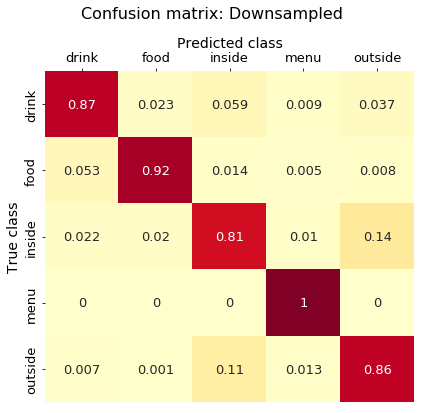

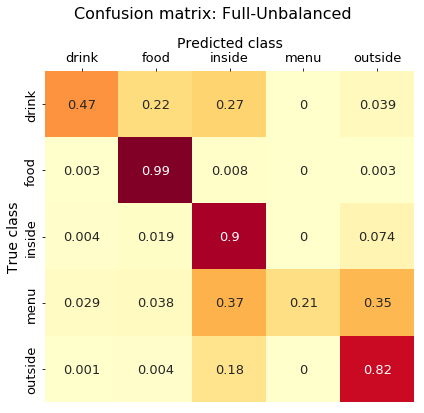

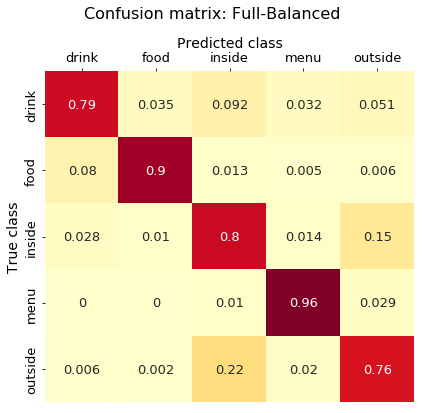

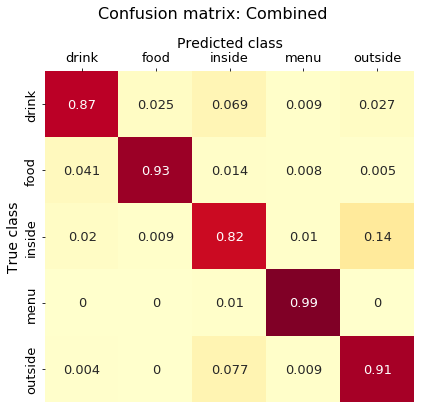

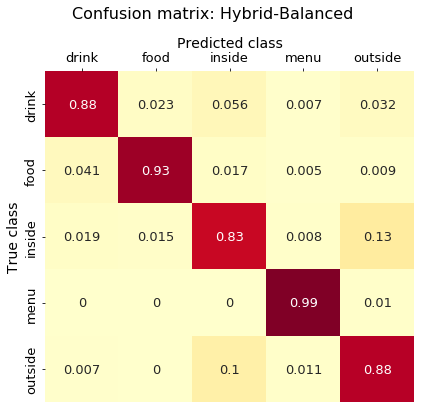

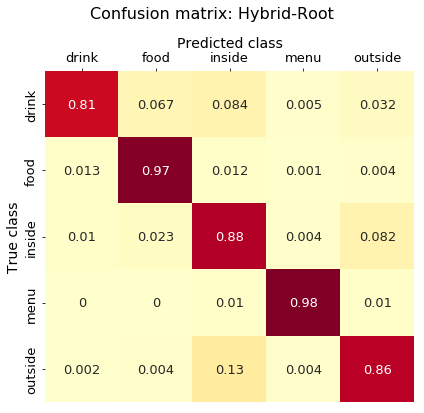

In [17]:
# formatted confusion matrix for each model
for model, metrics in model_metrics.items():
    # compute normalized confusion matrix
    cm = np.array(metrics['cm'])
    cm = cm/cm.sum(axis=1, keepdims=True) # normalize to class count
    cm = np.round(cm, 3)
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(data=cm, cmap='YlOrRd', annot=True, cbar=False, 
                annot_kws={"size": 13})
    plt.suptitle('Confusion matrix: {}'.format(model), y=0.95, fontsize=16)
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    
    # decode class labels
    tick_labels = ['drink', 'food', 'inside', 'menu', 'outside']
    ax.set_xticklabels(tick_labels, ha='center')
    ax.set_yticklabels(tick_labels, va='center')
    
    # format axes
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.title.set_fontsize(16)
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    
    
    plt.savefig('figures/val_cm_{}_model.png'.format(model.lower()))
    plt.show()

In [32]:
# evaluate hybrid-root on the test set
model_paths = {'Hybrid-Root': 'models/hybrid_training_model_sqrt.h5'}
test_path = 'H:/springboard/other_data/yelp/Photos/final_photos/test'
save_path = 'evals/hybrid_root_on_test.json'
model_metrics = c2t.eval_models(model_paths, test_path, save_path=save_path)

Building image generator...
Found 30000 images belonging to 5 classes.
Loading models/hybrid_training_model_sqrt.h5
Evaluating models/hybrid_training_model_sqrt.h5
Saving evaluation to evals/hybrid_root_on_test.json
Evaluation complete.



In [2]:
# save class imbalance approach comparison table
with open('evals/hybrid_root_on_test.json', 'r') as f:
    model_metrics = json.load(f)
    
c2t.print_eval(model_metrics['Hybrid-Root'])    

accuracy:  93.43%
loss:  0.1851
recalls:  [0.8131 0.9712 0.8782 0.9669 0.8445]
macro recall:  89.48%
f1s:  [0.7738 0.9792 0.8894 0.8089 0.7931]
macro f1:  0.8489
aucs:  [0.9865 0.9965 0.987  0.9996 0.9836]
macro auc:  0.9906
confusion matrix: 


[[905, 106, 72, 2, 28],
 [243, 19061, 226, 27, 69],
 [72, 125, 5860, 21, 595],
 [0, 2, 0, 146, 3],
 [6, 13, 346, 14, 2058]]

In [14]:
table = c2t.comp_table(model_metrics)
table.to_csv('figures/hybrid-root_test_performance.csv')
table

,Accuracy,MacR,MacF1,MacAUC,Drink,Food,Inside,Menu,Outside
Model,,,,,,,,,
Hybrid-Root,93.433,0.895,0.849,0.991,0.774,0.979,0.889,0.809,0.793


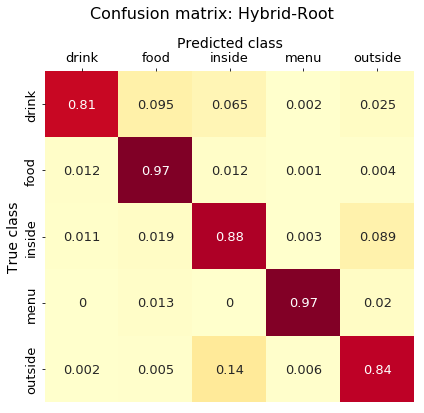

In [10]:
# formatted confusion matrix for each model
for model, metrics in model_metrics.items():
    # compute normalized confusion matrix
    cm = np.array(metrics['cm'])
    cm = cm/cm.sum(axis=1, keepdims=True) # normalize to class count
    cm = np.round(cm, 3)
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(data=cm, cmap='YlOrRd', annot=True, cbar=False, 
                annot_kws={"size": 13})
    plt.suptitle('Confusion matrix: {}'.format(model), y=0.95, fontsize=16)
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    
    # decode class labels
    tick_labels = ['drink', 'food', 'inside', 'menu', 'outside']
    ax.set_xticklabels(tick_labels, ha='center')
    ax.set_yticklabels(tick_labels, va='center')
    
    # format axes
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.title.set_fontsize(16)
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    
    
    plt.savefig('figures/test_cm_{}_model.png'.format(model.lower()))
    plt.show()

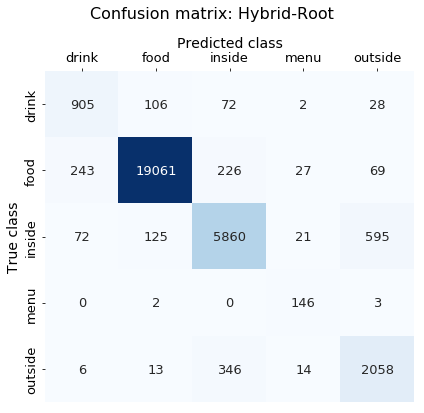

In [11]:
# formatted confusion matrix for each model
for model, metrics in model_metrics.items():
    # compute normalized confusion matrix
    cm = np.array(metrics['cm'])
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(data=cm, cmap='Blues', annot=True, cbar=False, fmt='g',
                annot_kws={"size": 13})
    plt.suptitle('Confusion matrix: {}'.format(model), y=0.95, fontsize=16)
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    
    # decode class labels
    tick_labels = ['drink', 'food', 'inside', 'menu', 'outside']
    ax.set_xticklabels(tick_labels, ha='center')
    ax.set_yticklabels(tick_labels, va='center')
    
    # format axes
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.title.set_fontsize(16)
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    
    
    plt.savefig('figures/test_cm_{}_model_raw.png'.format(model.lower()))
    plt.show()

In [22]:
# combine inside and outside to get projected 4-class performance
cm_setting = pd.DataFrame(model_metrics['Hybrid-Root']['cm'])
classes = ['drink', 'food', 'inside', 'menu', 'outside']
cm_setting.columns = classes
cm_setting.index = classes
cm_setting

,drink,food,inside,menu,outside
drink,905,106,72,2,28
food,243,19061,226,27,69
inside,72,125,5860,21,595
menu,0,2,0,146,3
outside,6,13,346,14,2058


In [23]:
# combine columns
cm_setting['setting'] = cm_setting.inside + cm_setting.outside
cm_setting.drop(['inside', 'outside'], inplace=True, axis=1)

#combine rows
cm_setting = cm_setting.transpose()
cm_setting['setting'] = cm_setting.inside + cm_setting.outside
cm_setting.drop(['inside', 'outside'], inplace=True, axis=1)
cm_setting = cm_setting.transpose()

cm_setting

,drink,food,menu,setting
drink,905,106,2,100
food,243,19061,27,295
menu,0,2,146,3
setting,78,138,35,8859


In [26]:
cm_np = cm_setting.values
print('accuracy: ', cm_np.diagonal().sum()/cm_np.sum())
print('MacR: ', (cm_np.diagonal()/cm_np.sum(axis=1)).mean())

accuracy:  0.9657
MacR:  0.930916158657111


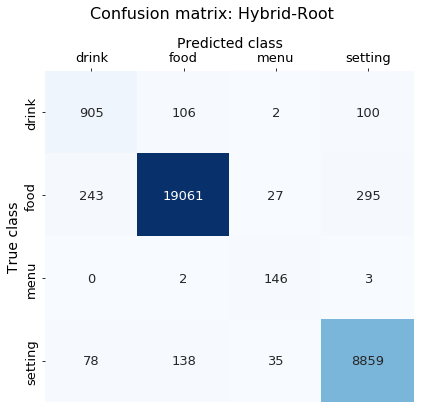

In [28]:
# compute normalized confusion matrix
cm = cm_np

# plot confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(data=cm, cmap='Blues', annot=True, cbar=False, fmt='g',
            annot_kws={"size": 13})
plt.suptitle('Confusion matrix: {}'.format(model), y=0.95, fontsize=16)
plt.xlabel('Predicted class')
plt.ylabel('True class')

# decode class labels
tick_labels = ['drink', 'food', 'menu', 'setting']
ax.set_xticklabels(tick_labels, ha='center')
ax.set_yticklabels(tick_labels, va='center')

# format axes
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.title.set_fontsize(16)
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)

plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.savefig('figures/test_cm_{}_model_raw_setting.png'.format(model.lower()))
plt.show()